In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats import ttest_ind
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

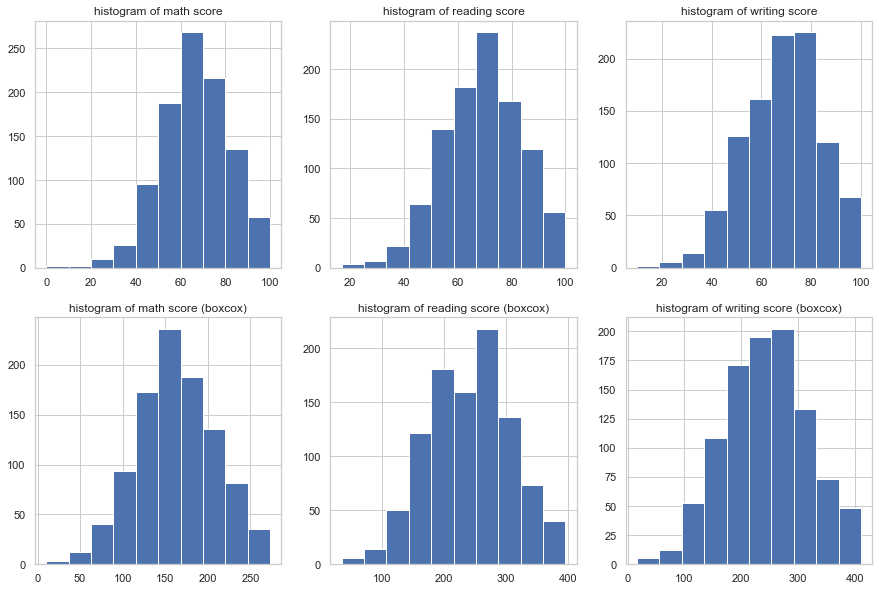

In [10]:

math_boxcox,_ = boxcox(student_df[student_df["math score"] > 0]["math score"])
reading_boxcox,_ = boxcox(student_df["reading score"])
writing_boxcox,_ = boxcox(student_df["writing score"])


plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.hist(student_df['math score'])
plt.title("histogram of math score")

plt.subplot(2, 3, 2)
plt.hist(student_df['reading score'])
plt.title("histogram of reading score")

plt.subplot(2, 3, 3)
plt.hist(student_df['writing score'])
plt.title("histogram of writing score")

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title("histogram of math score (boxcox)")

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title("histogram of reading score (boxcox)")

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title("histogram of writing score (boxcox)")

plt.show()

In [15]:
jb_stats = jarque_bera(student_df['math score'])
norm_stats = normaltest(student_df['math score'])

print("Jarque-Bera test statistics for math score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for math score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['reading score'])
norm_stats = normaltest(student_df['reading score'])

print("Jarque-Bera test statistics for reading score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for reading score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['writing score'])
norm_stats = normaltest(student_df['writing score'])

print("Jarque-Bera test statistics for writing score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for writing score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for math score is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics for math score is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics for reading score is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics for reading score is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics for writing score is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics for writing score is 13.606450837263859 and p value is 0.0011101885439899974


The original data disribtions are not normal.

In [16]:
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics for math score (boxcox) is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for math score (boxcox) is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics for reading score (boxcox) is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for reading score (boxcox) is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics for writing score (boxcox) is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for writing score (boxcox) is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics for math score (boxcox) is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics for math score (boxcox) is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics for reading score (boxcox) is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics for reading score (boxcox) is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics for writing score (boxcox) is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics for writing score (boxcox) is 6.267311355043339 and p value is 0.04355827085023795


The box_cox transformed data also are not normal disributions, but are closer to a normal disribution.

2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.


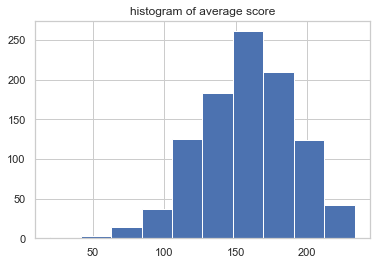

Jarque-Bera test statistics for avg score is 14.794822847029343 and p value is 0.0006128370853411003
Normality test statistics for avg score is 14.577573837792123 and p value is 0.0006831562742722329


In [38]:
avg_score = student_df['math score']+student_df['reading score']+student_df['writing score']/3


plt.hist(avg_score)
plt.title("histogram of average score")
plt.show()

jb_stats = jarque_bera(avg_score)
norm_stats = normaltest(avg_score)


print("Jarque-Bera test statistics for avg score is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for avg score is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))


The avg_score variable is not a normal disribution. 

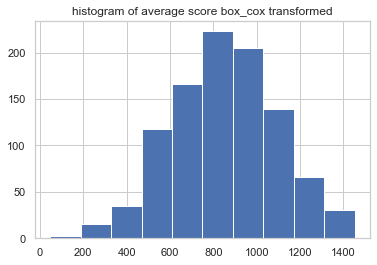

Jarque-Bera test statistics for avg score (boxcox) is 2.104830202065408 and p value is 0.3490936338140479
Normality test statistics for avg score (boxcox) is 2.33532854983865 and p value is 0.3110927203947047


In [34]:
avg_boxcox,_ = boxcox(avg_score)

plt.hist(avg_boxcox)
plt.title("histogram of average score box_cox transformed")
plt.show()

jb_stats = jarque_bera(avg_boxcox)
norm_stats = normaltest(avg_boxcox)


print("Jarque-Bera test statistics for avg score (boxcox) is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics for avg score (boxcox) is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

The box_cox transformed data is close to a normal distribution.

3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

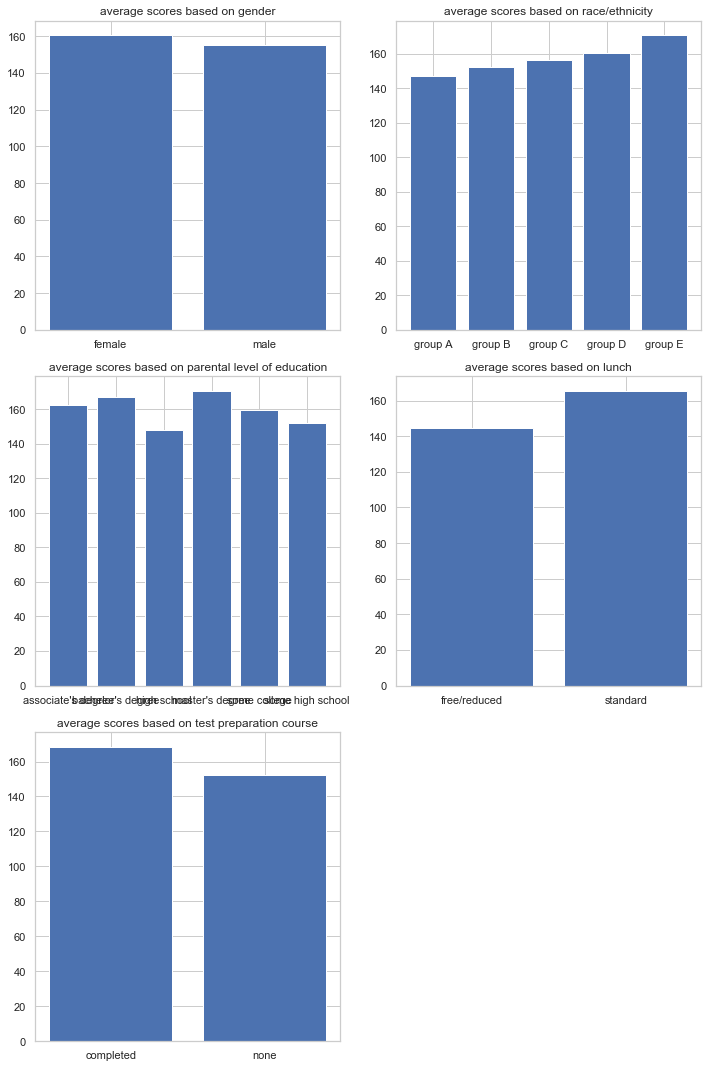

In [44]:
student_df["avg score"] = avg_score

plt.figure(figsize=(10, 15))


plt.subplot(3, 2, 1)
plt.bar(student_df.groupby("gender")
        ["avg score"].mean().index, student_df.groupby("gender")["avg score"].mean())

plt.title("average scores based on gender")



plt.subplot(3, 2, 2)
plt.bar(student_df.groupby("race/ethnicity")
        ["avg score"].mean().index, student_df.groupby("race/ethnicity")["avg score"].mean())

plt.title("average scores based on race/ethnicity")


plt.subplot(3, 2, 3)
plt.bar(student_df.groupby("parental level of education")
        ["avg score"].mean().index, student_df.groupby("parental level of education")["avg score"].mean())

plt.title("average scores based on parental level of education")

plt.subplot(3, 2, 4)
plt.bar(student_df.groupby("lunch")
        ["avg score"].mean().index, student_df.groupby("lunch")["avg score"].mean())

plt.title("average scores based on lunch")

plt.subplot(3, 2, 5)
plt.bar(student_df.groupby("test preparation course")
        ["avg score"].mean().index, student_df.groupby("test preparation course")["avg score"].mean())

plt.title("average scores based on test preparation course")

plt.tight_layout()
plt.show()

It seems that the variables of parental level of education and race/ethnicity are more related to target variable and can be more useful.